In [1]:

# importing the images from the zip file
from google.colab import drive
drive.mount('/content/drive') 

!unzip /content/drive/MyDrive/DeepLearning/chest_xray2.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/test/PNEUMONIA/person1938_bacteria_4854.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4859.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4861.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1940_bacteria_4862.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1941_bacteria_4863.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1942_bacteria_4865.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1943_bacteria_4868.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1944_bacteria_4869.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1945_bacteria_4872.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1946_bacteria_4874.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1946_bacteria_4875.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1947_bacteria_4876.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1949_bacteria_4880.jpeg  
  inflating: chest_xray/te

In [2]:
TrainDirectory = '/content/chest_xray/train'
ValidationDirectory = '/content/chest_xray/validation'
TestDirectory = '/content/chest_xray/test'


In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


img_height = 255
img_width = 255
epochs = 12
BatchSize=64

TrainData = tf.keras.utils.image_dataset_from_directory(
    TrainDirectory, seed=3, validation_split=None, subset=None, batch_size=BatchSize, shuffle=True,image_size=(img_height, img_width),label_mode='categorical')
    
ValidationData = tf.keras.utils.image_dataset_from_directory(
    ValidationDirectory, seed=3, validation_split=None, subset=None,shuffle=False, batch_size=BatchSize,image_size=(img_height, img_width),label_mode='categorical')

TestData = tf.keras.utils.image_dataset_from_directory(
    TestDirectory, seed=3, validation_split=None,shuffle=False, subset=None, batch_size=879,image_size=(img_height, img_width),label_mode='categorical')



Found 4099 files belonging to 2 classes.
Found 878 files belonging to 2 classes.
Found 879 files belonging to 2 classes.


In [4]:

# Importing the basic model - Resnet101 in this case
BasicModel = tf.keras.applications.densenet.DenseNet121(
    include_top=False, 
    weights='imagenet', 
    input_shape=(img_height, img_width, 3), 
    input_tensor=tf.keras.Input(shape=(img_height, img_width, 3))
)

# Making sure that the basic model is not trainable
BasicModel.trainable = False

# Adding to the model 2 Fully Connected layers
model = tf.keras.Sequential (
    [
         tf.keras.layers.Input(shape=(img_height, img_width, 3)),
         tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
         BasicModel,
         tf.keras.layers.Dense(8,activation='relu'),
         tf.keras.layers.Dense(5,activation='relu'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(2,activation="softmax")
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#augmentaions random flip
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

aug_TrainData = TrainData.map(
  lambda x, y: (data_augmentation(x, training=True), y))

aug_ValidationData = ValidationData.map(
  lambda x, y: (data_augmentation(x, training=True), y))


model.summary()


29097984/29084464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 255, 255, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 dense (Dense)               (None, 8, 8, 8)           8200      
                                                                 
 dense_1 (Dense)             (None, 8, 8, 5)           45        
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 642       
                                                         

In [5]:
history = model.fit(TrainData, validation_data=ValidationData , batch_size=BatchSize, epochs=epochs)

Epoch 1/12
65/65 [==============================] - 902s 14s/step - loss: 0.2648 - accuracy: 0.8827 - val_loss: 0.1492 - val_accuracy: 0.9385
Epoch 2/12
65/65 [==============================] - 909s 14s/step - loss: 0.1371 - accuracy: 0.9497 - val_loss: 0.1217 - val_accuracy: 0.9487
Epoch 3/12
65/65 [==============================] - 921s 14s/step - loss: 0.1284 - accuracy: 0.9515 - val_loss: 0.1187 - val_accuracy: 0.9556
Epoch 4/12
65/65 [==============================] - 926s 14s/step - loss: 0.1002 - accuracy: 0.9656 - val_loss: 0.1971 - val_accuracy: 0.9191
Epoch 5/12
65/65 [==============================] - 913s 14s/step - loss: 0.0964 - accuracy: 0.9658 - val_loss: 0.1020 - val_accuracy: 0.9533
Epoch 6/12
65/65 [==============================] - 905s 14s/step - loss: 0.0833 - accuracy: 0.9715 - val_loss: 0.1069 - val_accuracy: 0.9556
Epoch 7/12
65/65 [==============================] - 906s 14s/step - loss: 0.0780 - accuracy: 0.9749 - val_loss: 0.1274 - val_accuracy: 0.9510
Epoch 

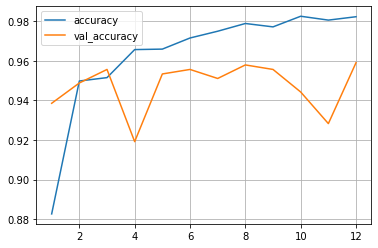

In [6]:
ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,epochs+1),history.history['accuracy'])
line2 = ax.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

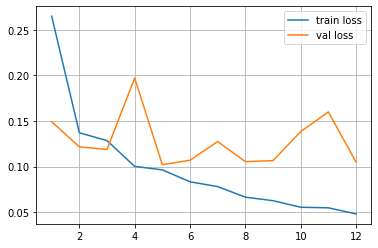

In [7]:
ax = plt.subplot(1,1,1)
line1 = ax.plot(range(1,epochs+1),history.history['loss'])
line2 = ax.plot(range(1,epochs+1),history.history['val_loss'])
# plt.ylim(0,0.4)
plt.legend(["train loss", "val loss"])
plt.grid(visible=True, which='both', axis='both')
plt.show()

In [8]:
loss, accuracy = model.evaluate(TestData)
print("Loss :", loss)
print("Accuracy :", accuracy)

1/1 [==============================] - 191s 191s/step - loss: 0.0968 - accuracy: 0.9659
Loss : 0.0968031957745552
Accuracy : 0.9658703207969666


In [9]:
#confusion matrix

predictions = model.predict(TestData)
predictions = np.argmin(predictions, axis=1)

test_y = next(TestData.as_numpy_iterator())[1]
test_y = np.argmin(test_y, axis = 1)

confusion_mat = tf.math.confusion_matrix(test_y,predictions)
TP = confusion_mat.numpy()[0,0];
FP = confusion_mat.numpy()[1,0];
FN = confusion_mat.numpy()[0,1];
TN = confusion_mat.numpy()[1,1];

precision=TP / (TP + FP)
recall=TP / (TP + FN)
print("Precision: " + str(precision));
print("Recall: " + str(recall));
print("confusion matrix: " + str(confusion_mat))

Precision: 0.9649923896499238
Recall: 0.9890795631825273
confusion matrix: tf.Tensor(
[[634   7]
 [ 23 215]], shape=(2, 2), dtype=int32)
